# **Data Cleaning :-**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Create a dictionary with messy data
data = {
    'EmployeeID': ['E001', 'E002', 'E003', 'E004', 'E005', 'E006', None, 'E008', 'E009', 'E010', 'E002'],
    'Name': ['John Smith', 'Jane Doe', 'Peter Jones', 'Mary Jane', '   Tom Brown', 'John Smith', 'Alice Blue', 'Robert Green', 'PETER JONES', 'Susan White', 'Jane Doe'],
    'Department': ['Sales', 'Marketing', '  Sales', 'HR', 'IT', 'Marketing', 'IT', 'Finance', 'Sales', 'hr', 'Marketing'],
    'StartDate': ['2020-01-15', '2019/03/12', '2021-05-21', '2018-11-30', '2022-02-01', '2023-07-10', '2022-02-01', '2018-11-30', '2021-05-21', '2023-01-15', '2019/03/12'],
    'Salary': ['$60,000', '75000', '$62,000', '55000', '$120,000', '76000', '110000', '$90,000', '62000', '$54,000', '75000'],
    'PerformanceScore': [4.5, 3.8, 4.7, 3.2, 5.0, 3.9, 4.8, 3.5, 4.7, 'Not Available', 3.8],
    'LastBonus': [5000, 4000, 5200, 3000, 10000, 4100, 9500, 6000, 5200, None, 4000],
    'YearsAtCompany': [4, 5, 3, 6, 2, 1, 2, 6, 3, 1, 5]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Introduce some more NaN values strategically
df.loc[4, 'YearsAtCompany'] = np.nan
df.loc[6, 'Salary'] = np.nan
df.loc[1, 'LastBonus'] = np.nan

In [ ]:
df.head(11)

,EmployeeID,Name,Department,StartDate,Salary,PerformanceScore,LastBonus,YearsAtCompany
0,E001,John Smith,Sales,2020-01-15,"$60,000",4.5,5000.0,4.0
1,E002,Jane Doe,Marketing,2019/03/12,75000,3.8,NaN,5.0
2,E003,Peter Jones,Sales,2021-05-21,"$62,000",4.7,5200.0,3.0
3,E004,Mary Jane,HR,2018-11-30,55000,3.2,3000.0,6.0
4,E005,Tom Brown,IT,2022-02-01,"$120,000",5.0,10000.0,NaN
5,E006,John Smith,Marketing,2023-07-10,76000,3.9,4100.0,1.0
6,None,Alice Blue,IT,2022-02-01,NaN,4.8,9500.0,2.0
7,E008,Robert Green,Finance,2018-11-30,"$90,000",3.5,6000.0,6.0
8,E009,PETER JONES,Sales,2021-05-21,62000,4.7,5200.0,3.0
9,E010,Susan White,hr,2023-01-15,"$54,000",Not Available,NaN,1.0


In [6]:
df.info()   # Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        10 non-null     object 
 1   Name              11 non-null     object 
 2   Department        11 non-null     object 
 3   StartDate         11 non-null     object 
 4   Salary            10 non-null     object 
 5   PerformanceScore  11 non-null     object 
 6   LastBonus         9 non-null      float64
 7   YearsAtCompany    10 non-null     float64
dtypes: float64(2), object(6)
memory usage: 836.0+ bytes


### Initial Observations from .info():
**EmployeeID** has a missing value.

**Name** and **Department** look complete but we suspect formatting issues.

**StartDate** is an object type, not datetime.

**Salary** is an object type due to '$' and commas.

**PerformanceScore** is an object type because of the 'Not Available' string.

**LastBonus** and **YearsAtCompany** have missing values and are float64, which is fine for now.

In [8]:
df.describe(include='all')  # Describes all the Columns

,EmployeeID,Name,Department,StartDate,Salary,PerformanceScore,LastBonus,YearsAtCompany
count,10,11,11,11,10,11.0,9.000000,10.000000
unique,9,9,7,7,9,9.0,NaN,NaN
top,E002,John Smith,Marketing,2019/03/12,75000,3.8,NaN,NaN
freq,2,2,3,2,2,2.0,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5777.777778,3.600000
std,NaN,NaN,NaN,NaN,NaN,NaN,2415.976913,1.897367
min,NaN,NaN,NaN,NaN,NaN,NaN,3000.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,4100.000000,2.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,5200.000000,3.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,6000.000000,5.000000


In [10]:
df_cleaned = df.copy()   #Copy of the original DataFrame

In [11]:
# Check for duplicate rows based on all columns
print(f"Number of fully duplicate rows: {df_cleaned.duplicated().sum()}\n")

Number of fully duplicate rows: 0



In [12]:
# Check for duplicates based on a subset of columns, like EmployeeID
print(f"Number of duplicate EmployeeIDs: {df_cleaned.duplicated(subset=['EmployeeID']).sum()}\n")

Number of duplicate EmployeeIDs: 1



In [14]:
# Drop duplicates based on EmployeeID, keeping the first instance
df_cleaned.drop_duplicates(subset=['EmployeeID'], keep='first', inplace=True)

In [15]:
print("DataFrame after dropping duplicates based on EmployeeID:")
df_cleaned.head(11)

DataFrame after dropping duplicates based on EmployeeID:


,EmployeeID,Name,Department,StartDate,Salary,PerformanceScore,LastBonus,YearsAtCompany
0,E001,John Smith,Sales,2020-01-15,"$60,000",4.5,5000.0,4.0
1,E002,Jane Doe,Marketing,2019/03/12,75000,3.8,NaN,5.0
2,E003,Peter Jones,Sales,2021-05-21,"$62,000",4.7,5200.0,3.0
3,E004,Mary Jane,HR,2018-11-30,55000,3.2,3000.0,6.0
4,E005,Tom Brown,IT,2022-02-01,"$120,000",5.0,10000.0,NaN
5,E006,John Smith,Marketing,2023-07-10,76000,3.9,4100.0,1.0
6,None,Alice Blue,IT,2022-02-01,NaN,4.8,9500.0,2.0
7,E008,Robert Green,Finance,2018-11-30,"$90,000",3.5,6000.0,6.0
8,E009,PETER JONES,Sales,2021-05-21,62000,4.7,5200.0,3.0
9,E010,Susan White,hr,2023-01-15,"$54,000",Not Available,NaN,1.0


### Cleaning Column Names and Text Data :

In [16]:
# Clean up column names (e.g., lowercase and replace spaces)
df_cleaned.columns = df_cleaned.columns.str.lower().str.replace(' ', '_')

# Clean string columns
for col in ['name', 'department']:
    df_cleaned[col] = df_cleaned[col].str.strip() # Remove leading/trailing spaces
    df_cleaned[col] = df_cleaned[col].str.title() # Convert to Title Case for consistency


# Check the value counts for 'department'
print(df_cleaned['department'].value_counts())

df_cleaned.head(11)

department
Sales        3
Marketing    2
Hr           2
It           2
Finance      1
Name: count, dtype: int64


,employeeid,name,department,startdate,salary,performancescore,lastbonus,yearsatcompany
0,E001,John Smith,Sales,2020-01-15,"$60,000",4.5,5000.0,4.0
1,E002,Jane Doe,Marketing,2019/03/12,75000,3.8,NaN,5.0
2,E003,Peter Jones,Sales,2021-05-21,"$62,000",4.7,5200.0,3.0
3,E004,Mary Jane,Hr,2018-11-30,55000,3.2,3000.0,6.0
4,E005,Tom Brown,It,2022-02-01,"$120,000",5.0,10000.0,NaN
5,E006,John Smith,Marketing,2023-07-10,76000,3.9,4100.0,1.0
6,None,Alice Blue,It,2022-02-01,NaN,4.8,9500.0,2.0
7,E008,Robert Green,Finance,2018-11-30,"$90,000",3.5,6000.0,6.0
8,E009,Peter Jones,Sales,2021-05-21,62000,4.7,5200.0,3.0
9,E010,Susan White,Hr,2023-01-15,"$54,000",Not Available,NaN,1.0


### Correcting Data Types :

In [17]:
# Clean and convert 'salary'
df_cleaned['salary'] = df_cleaned['salary'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)   # Removing '$' and ','
df_cleaned['salary'] = pd.to_numeric(df_cleaned['salary'], errors='coerce')   # Convert to numeric

# Convert 'performancescore' to numeric
df_cleaned['performancescore'] = pd.to_numeric(df_cleaned['performancescore'], errors='coerce')

# Convert 'startdate' to datetime
df_cleaned['startdate'] = pd.to_datetime(df_cleaned['startdate'], errors='coerce')

# Check the dtypes again
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   employeeid        9 non-null      object        
 1   name              10 non-null     object        
 2   department        10 non-null     object        
 3   startdate         9 non-null      datetime64[ns]
 4   salary            9 non-null      float64       
 5   performancescore  9 non-null      float64       
 6   lastbonus         8 non-null      float64       
 7   yearsatcompany    9 non-null      float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 720.0+ bytes


### Handling Missing Values :

In [18]:
# Count missing values in each column
print("Missing values before imputation:")
print(df_cleaned.isnull().sum())

Missing values before imputation:
employeeid          1
name                0
department          0
startdate           1
salary              1
performancescore    1
lastbonus           2
yearsatcompany      1
dtype: int64


In [19]:
# Drop rows where 'employeeid' is missing
df_cleaned.dropna(subset=['employeeid'], inplace=True)

# Impute numerical columns with the median
for col in ['salary', 'lastbonus', 'performancescore', 'yearsatcompany']:
    median_val = df_cleaned[col].median()
    df_cleaned[col].fillna(median_val, inplace=True)

print("\nMissing values after imputation:")
print(df_cleaned.isnull().sum())


Missing values after imputation:
employeeid          0
name                0
department          0
startdate           1
salary              0
performancescore    0
lastbonus           0
yearsatcompany      0
dtype: int64


In [20]:
df_cleaned

,employeeid,name,department,startdate,salary,performancescore,lastbonus,yearsatcompany
0,E001,John Smith,Sales,2020-01-15,60000.0,4.5,5000.0,4.0
1,E002,Jane Doe,Marketing,NaT,75000.0,3.8,5200.0,5.0
2,E003,Peter Jones,Sales,2021-05-21,62000.0,4.7,5200.0,3.0
3,E004,Mary Jane,Hr,2018-11-30,55000.0,3.2,3000.0,6.0
4,E005,Tom Brown,It,2022-02-01,120000.0,5.0,10000.0,3.5
5,E006,John Smith,Marketing,2023-07-10,76000.0,3.9,4100.0,1.0
7,E008,Robert Green,Finance,2018-11-30,90000.0,3.5,6000.0,6.0
8,E009,Peter Jones,Sales,2021-05-21,62000.0,4.7,5200.0,3.0
9,E010,Susan White,Hr,2023-01-15,54000.0,4.2,5200.0,1.0


### Identifying and Handling Outliers :

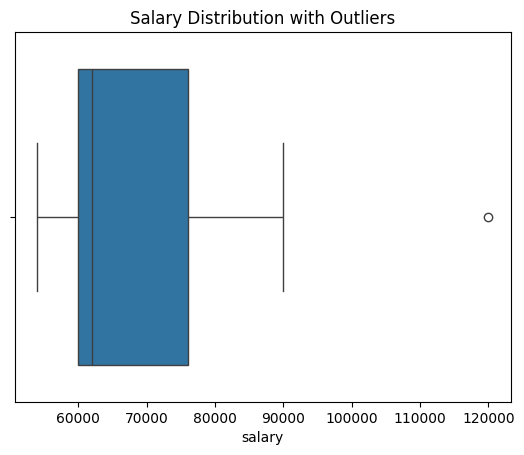

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df_cleaned['salary'])
plt.title('Salary Distribution with Outliers')
plt.show()

In [23]:
Q1 = df_cleaned['salary'].quantile(0.25)
Q3 = df_cleaned['salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Salary Lower Bound for Outliers: {lower_bound}")
print(f"Salary Upper Bound for Outliers: {upper_bound}\n")

# Filter to see the outliers
outliers = df_cleaned[(df_cleaned['salary'] < lower_bound) | (df_cleaned['salary'] > upper_bound)]
print("Identified Outliers:")
print(outliers)

Salary Lower Bound for Outliers: 36000.0
Salary Upper Bound for Outliers: 100000.0

Identified Outliers:
  employeeid       name department  startdate    salary  performancescore  \
4       E005  Tom Brown         It 2022-02-01  120000.0               5.0   

   lastbonus  yearsatcompany  
4    10000.0             3.5  


In [25]:
df_cleaned['salary'] = np.where(df_cleaned['salary'] > upper_bound, upper_bound, df_cleaned['salary'])

# Verify by checking the max salary now
print(f"Max salary after capping: {df_cleaned['salary'].max()}")

Max salary after capping: 100000.0


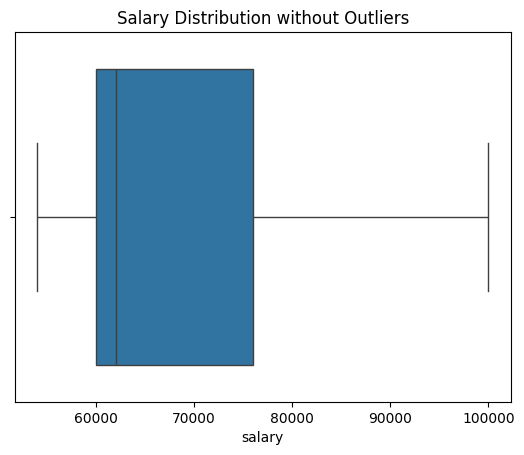

In [27]:
sns.boxplot(x=df_cleaned['salary'])
plt.title('Salary Distribution without Outliers')
plt.show()

### Feature Engineering :

In [24]:
df_cleaned['bonus_to_salary_ratio'] = (df_cleaned['lastbonus'] / df_cleaned['salary']).round(2)
df_cleaned.head(10)

,employeeid,name,department,startdate,salary,performancescore,lastbonus,yearsatcompany,bonus_to_salary_ratio
0,E001,John Smith,Sales,2020-01-15,60000.0,4.5,5000.0,4.0,0.08
1,E002,Jane Doe,Marketing,NaT,75000.0,3.8,5200.0,5.0,0.07
2,E003,Peter Jones,Sales,2021-05-21,62000.0,4.7,5200.0,3.0,0.08
3,E004,Mary Jane,Hr,2018-11-30,55000.0,3.2,3000.0,6.0,0.05
4,E005,Tom Brown,It,2022-02-01,120000.0,5.0,10000.0,3.5,0.08
5,E006,John Smith,Marketing,2023-07-10,76000.0,3.9,4100.0,1.0,0.05
7,E008,Robert Green,Finance,2018-11-30,90000.0,3.5,6000.0,6.0,0.07
8,E009,Peter Jones,Sales,2021-05-21,62000.0,4.7,5200.0,3.0,0.08
9,E010,Susan White,Hr,2023-01-15,54000.0,4.2,5200.0,1.0,0.10


### Final Review :

In [32]:
print("👉Final DataFrame Info:")
df_cleaned.info()

print("\n👉Final DataFrame Description:")
df_cleaned.describe()

👉Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   employeeid             9 non-null      object        
 1   name                   9 non-null      object        
 2   department             9 non-null      object        
 3   startdate              8 non-null      datetime64[ns]
 4   salary                 9 non-null      float64       
 5   performancescore       9 non-null      float64       
 6   lastbonus              9 non-null      float64       
 7   yearsatcompany         9 non-null      float64       
 8   bonus_to_salary_ratio  9 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 720.0+ bytes

👉Final DataFrame Description:


,startdate,salary,performancescore,lastbonus,yearsatcompany,bonus_to_salary_ratio
count,8,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2021-02-27 18:00:00,70444.444444,4.166667,5433.333333,3.611111,0.073333
min,2018-11-30 00:00:00,54000.000000,3.200000,3000.000000,1.000000,0.050000
25%,2019-10-04 06:00:00,60000.000000,3.800000,5000.000000,3.000000,0.070000
50%,2021-05-21 00:00:00,62000.000000,4.200000,5200.000000,3.500000,0.080000
75%,2022-04-29 00:00:00,76000.000000,4.700000,5200.000000,5.000000,0.080000
max,2023-07-10 00:00:00,100000.000000,5.000000,10000.000000,6.000000,0.100000
std,NaN,16078.799015,0.608276,1913.112647,1.867113,0.015811


In [33]:
print("\n👉Final DataFrame Head:")
df_cleaned.head(10)


👉Final DataFrame Head:


,employeeid,name,department,startdate,salary,performancescore,lastbonus,yearsatcompany,bonus_to_salary_ratio
0,E001,John Smith,Sales,2020-01-15,60000.0,4.5,5000.0,4.0,0.08
1,E002,Jane Doe,Marketing,NaT,75000.0,3.8,5200.0,5.0,0.07
2,E003,Peter Jones,Sales,2021-05-21,62000.0,4.7,5200.0,3.0,0.08
3,E004,Mary Jane,Hr,2018-11-30,55000.0,3.2,3000.0,6.0,0.05
4,E005,Tom Brown,It,2022-02-01,100000.0,5.0,10000.0,3.5,0.08
5,E006,John Smith,Marketing,2023-07-10,76000.0,3.9,4100.0,1.0,0.05
7,E008,Robert Green,Finance,2018-11-30,90000.0,3.5,6000.0,6.0,0.07
8,E009,Peter Jones,Sales,2021-05-21,62000.0,4.7,5200.0,3.0,0.08
9,E010,Susan White,Hr,2023-01-15,54000.0,4.2,5200.0,1.0,0.10


# **Data Visualization :-**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Set the style for seaborn plots
sns.set_theme(style="whitegrid")

# Generate a synthetic dataset
np.random.seed(42)
num_samples = 500

data = {
    'Date': pd.to_datetime(np.random.choice(pd.to_datetime(['2023-01-15', '2023-02-20', '2023-03-10']), num_samples)),
    'Product_Category': np.random.choice(['Electronics', 'Clothing', 'Home Goods', 'Books'], num_samples),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], num_samples),
    'Units_Sold': np.random.randint(1, 100, size=num_samples),
    'Unit_Price': np.random.choice([19.99, 29.99, 49.99, 99.99, 149.99], num_samples),
    'Customer_Satisfaction': np.random.uniform(1, 5, size=num_samples).round(1),
}

df = pd.DataFrame(data)

# Create calculated columns
df['Total_Sales'] = df['Units_Sold'] * df['Unit_Price']
df['Profit_Margin'] = np.random.uniform(0.1, 0.4, size=num_samples)
df['Profit'] = df['Total_Sales'] * df['Profit_Margin']

# Introduce some correlation
df['Marketing_Spend'] = df['Total_Sales'] * np.random.uniform(0.1, 0.2) + np.random.normal(0, 50, num_samples)
df.loc[df['Product_Category'] == 'Electronics', 'Total_Sales'] *= 1.5
df.loc[df['Region'] == 'East', 'Total_Sales'] *= 1.2

df.head()

,Date,Product_Category,Region,Units_Sold,Unit_Price,Customer_Satisfaction,Total_Sales,Profit_Margin,Profit,Marketing_Spend
0,2023-03-10,Clothing,East,71,29.99,4.4,2555.148,0.338197,720.119309,376.246436
1,2023-01-15,Clothing,East,1,149.99,3.7,179.988,0.249177,37.374025,8.048884
2,2023-03-10,Home Goods,North,96,49.99,4.2,4799.040,0.201933,969.085703,720.300050
3,2023-03-10,Clothing,North,13,19.99,4.1,259.870,0.361641,93.979571,5.439060
4,2023-01-15,Books,South,94,19.99,1.6,1879.060,0.263454,495.046489,289.748277


### Line Plot :

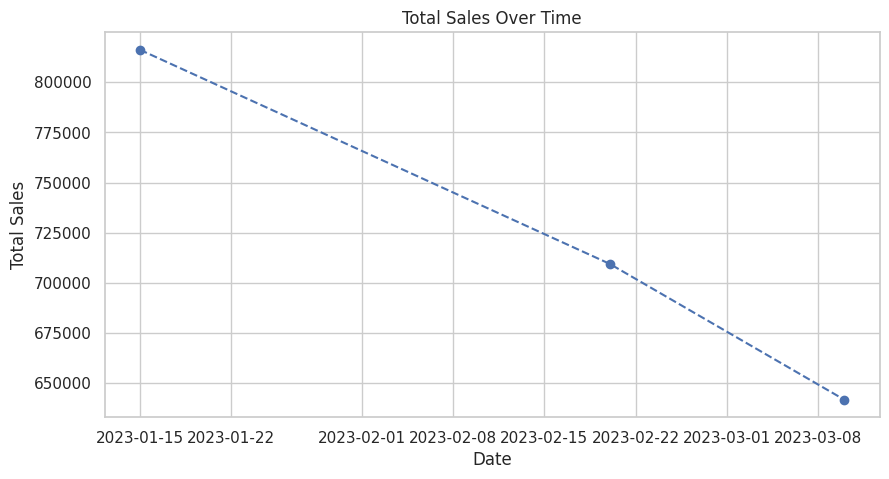

In [9]:
# Prepare data for time series plot
daily_sales = df.groupby('Date')['Total_Sales'].sum().reset_index()
daily_sales = daily_sales.sort_values('Date')

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(daily_sales['Date'], daily_sales['Total_Sales'], marker='o', linestyle='--')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## Bar Plot :

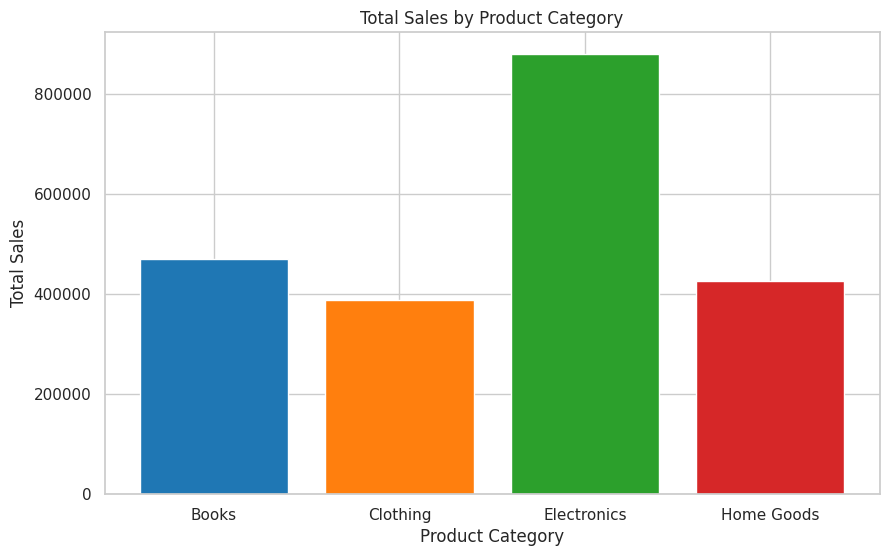

In [10]:
# Prepare data
category_sales = df.groupby('Product_Category')['Total_Sales'].sum().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(category_sales['Product_Category'], category_sales['Total_Sales'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

## Histogram :




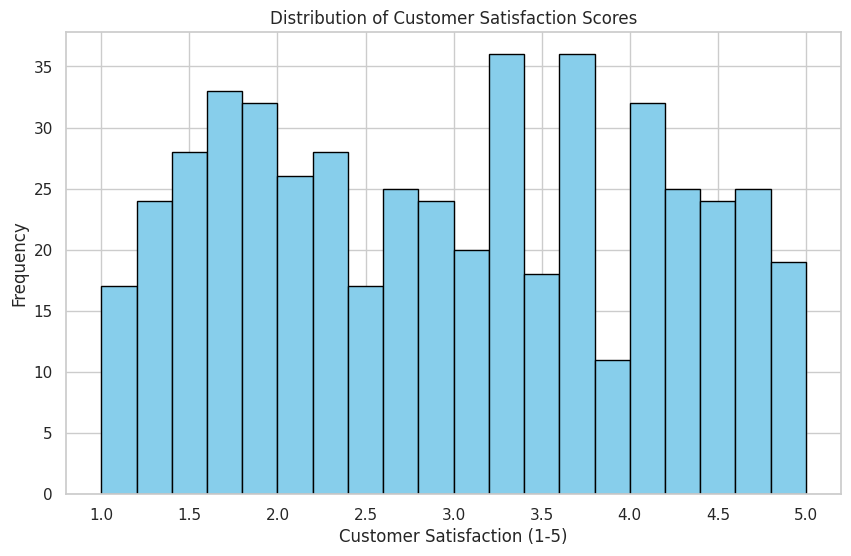

In [11]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(df['Customer_Satisfaction'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Satisfaction Scores')
plt.xlabel('Customer Satisfaction (1-5)')
plt.ylabel('Frequency')
plt.show()

## Scatter Plot :

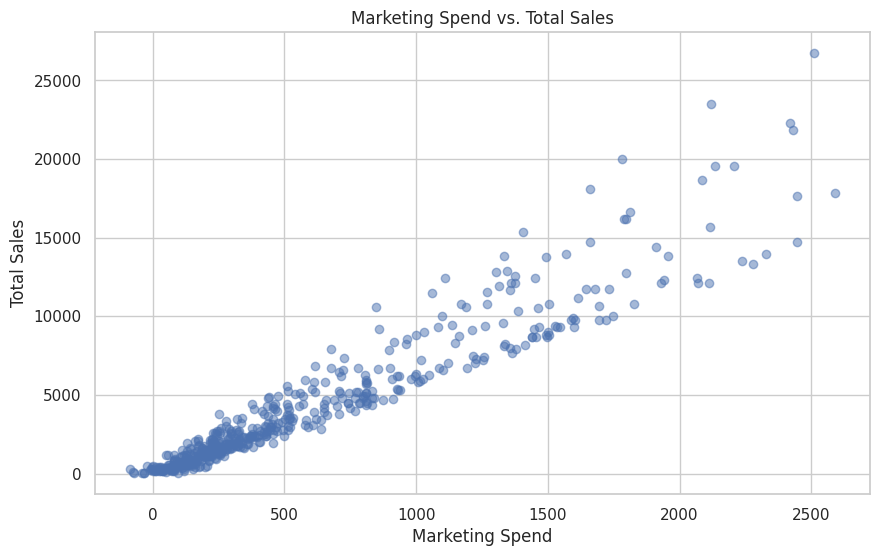

In [12]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Marketing_Spend'], df['Total_Sales'], alpha=0.5)
plt.title('Marketing Spend vs. Total Sales')
plt.xlabel('Marketing Spend')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## Pie Chart :

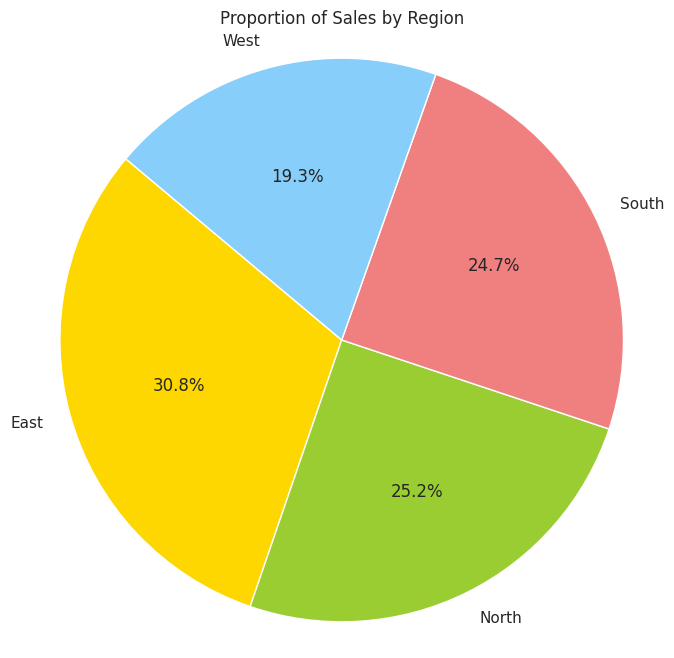

In [13]:
# Prepare data
region_sales = df.groupby('Region')['Total_Sales'].sum()

# Create the plot
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
plt.title('Proportion of Sales by Region')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Stacked Bar Chart :

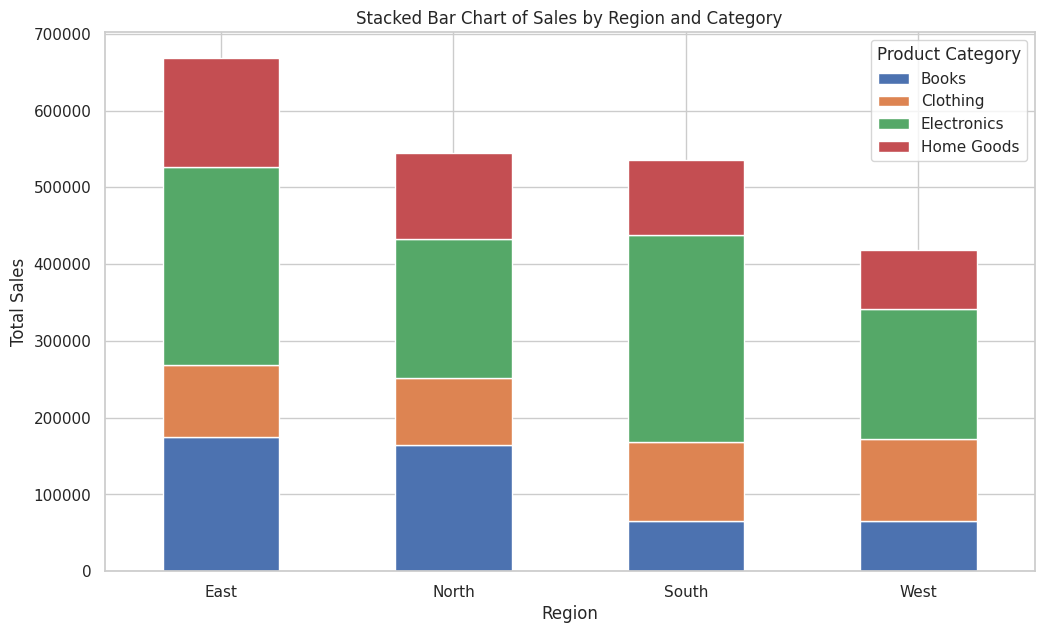

In [14]:
# Prepare data
region_category_sales = df.groupby(['Region', 'Product_Category'])['Total_Sales'].sum().unstack()

# Create the plot
region_category_sales.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Stacked Bar Chart of Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.show()

## Subplots :

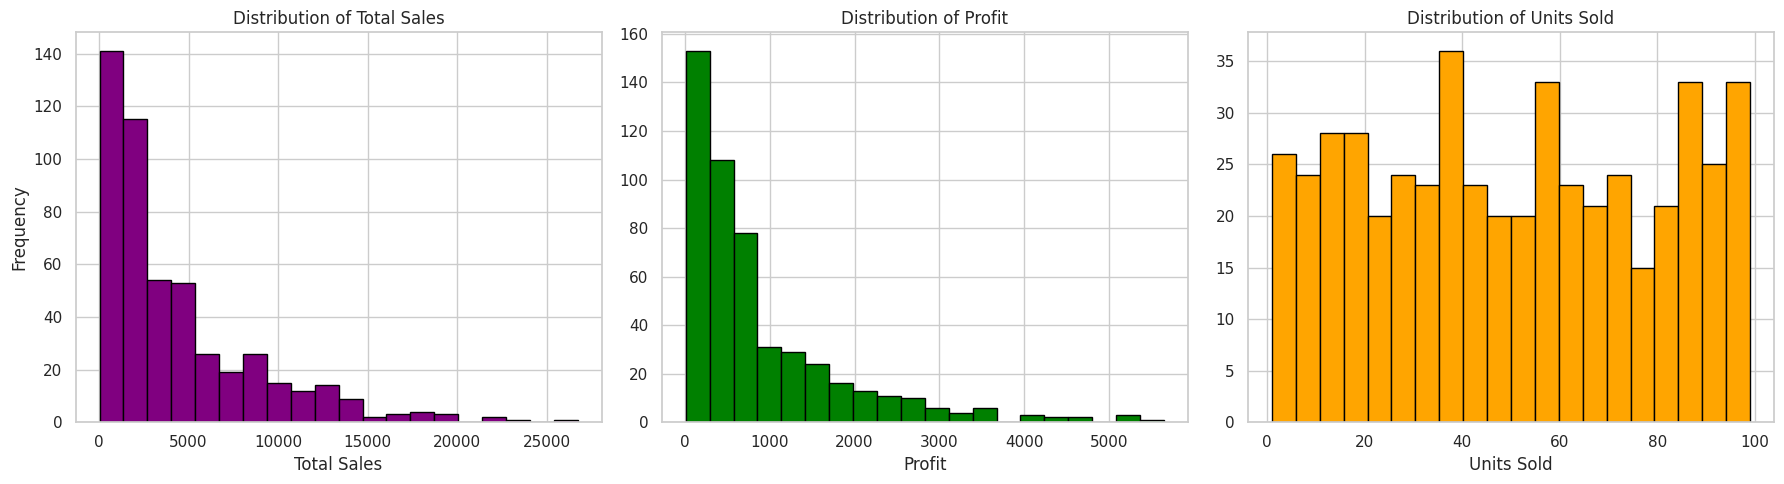

In [17]:
# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot histograms on each subplot
axes[0].hist(df['Total_Sales'], bins=20, color='purple', edgecolor='black')
axes[0].set_title('Distribution of Total Sales')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['Profit'], bins=20, color='green', edgecolor='black')
axes[1].set_title('Distribution of Profit')
axes[1].set_xlabel('Profit')

axes[2].hist(df['Units_Sold'], bins=20, color='orange', edgecolor='black')
axes[2].set_title('Distribution of Units Sold')
axes[2].set_xlabel('Units Sold')

plt.tight_layout() # Adjust subplots to give some padding.
plt.show()

 ## 3D Scatter Plot :


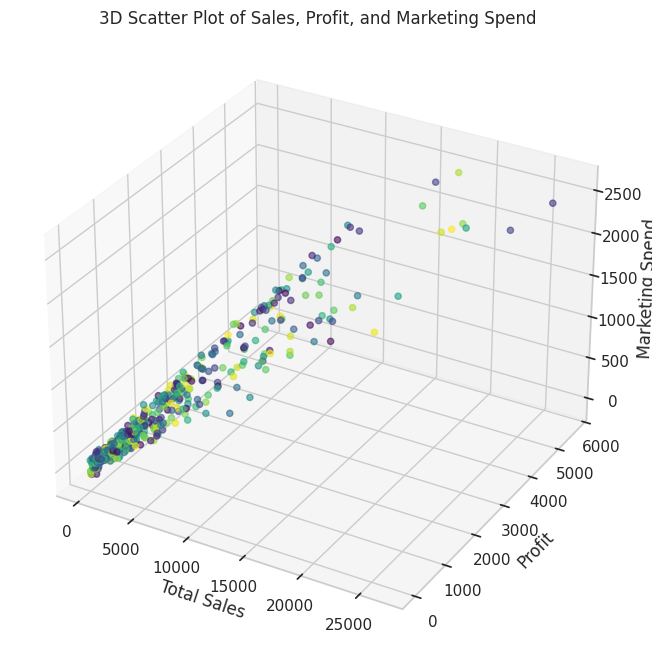

In [16]:
# Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Total_Sales'], df['Profit'], df['Marketing_Spend'], c=df['Customer_Satisfaction'], cmap='viridis', alpha=0.6)

ax.set_title('3D Scatter Plot of Sales, Profit, and Marketing Spend')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Profit')
ax.set_zlabel('Marketing Spend')

plt.show()

## Enhanced Scatter Plot :

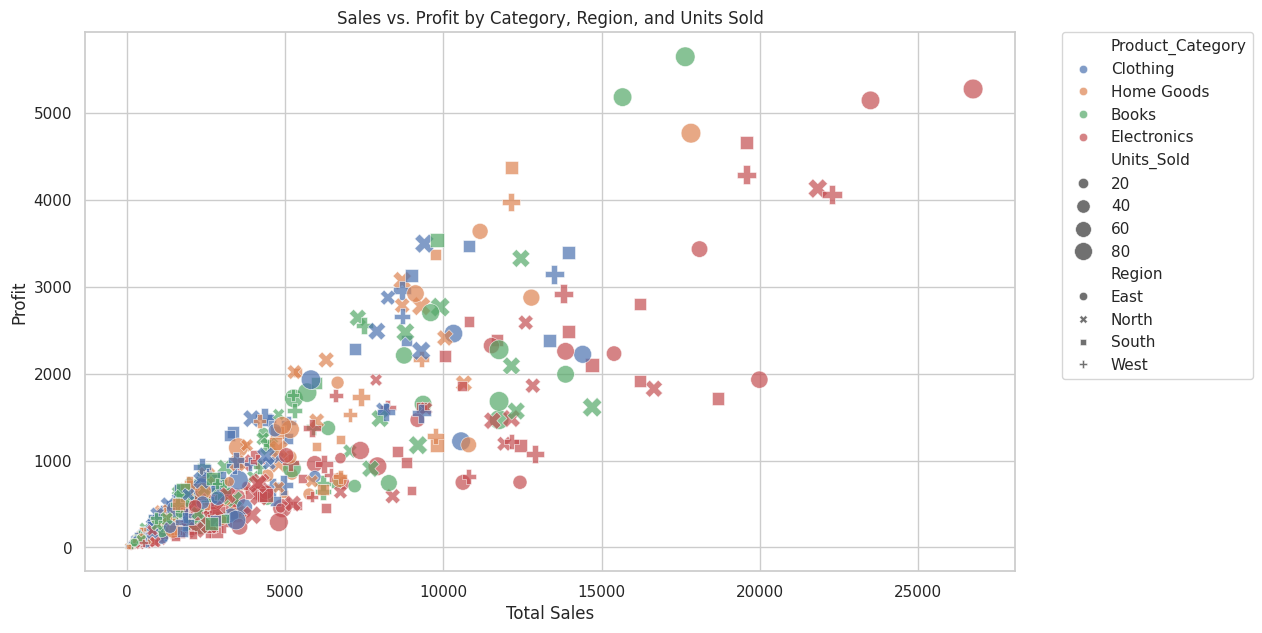

In [18]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='Total_Sales',
    y='Profit',
    hue='Product_Category', # Color points by category
    size='Units_Sold',      # Size points by units sold
    style='Region',         # Style markers by region
    alpha=0.7,
    sizes=(20, 200)
)
plt.title('Sales vs. Profit by Category, Region, and Units Sold')
plt.xlabel('Total Sales')
plt.ylabel('Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Distribution Plot (histplot with KDE) :

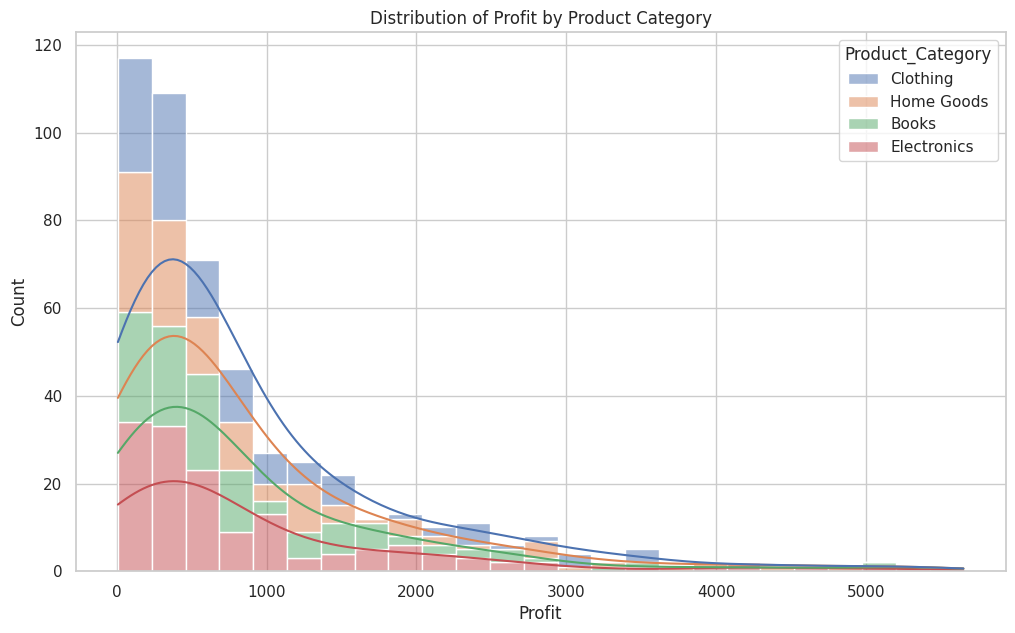

In [19]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Profit', hue='Product_Category', kde=True, multiple="stack")
plt.title('Distribution of Profit by Product Category')
plt.xlabel('Profit')
plt.ylabel('Count')
plt.show()

## Box Plot :

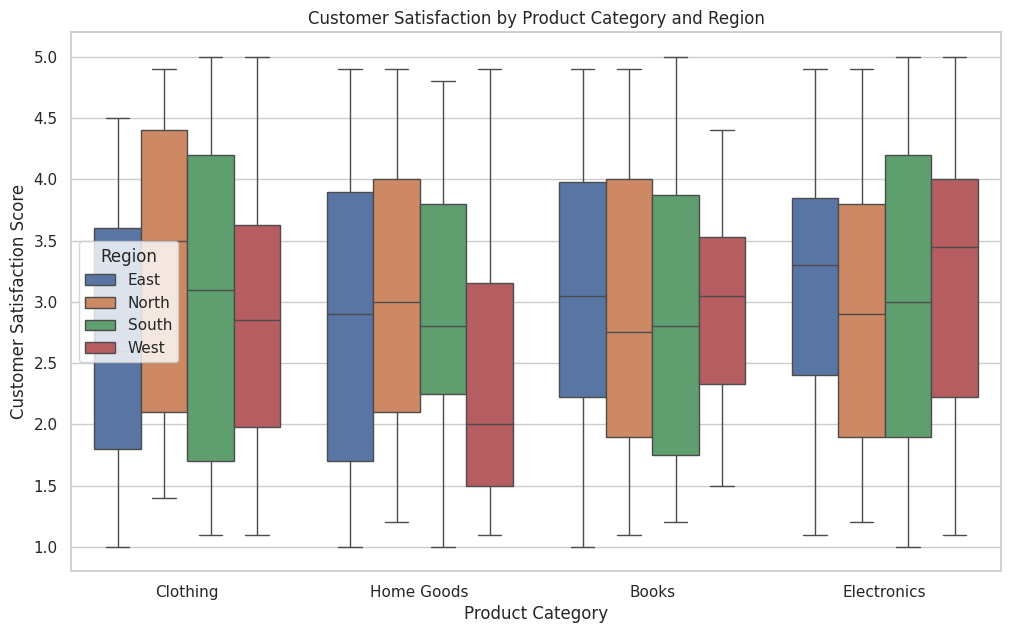

In [20]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Product_Category', y='Customer_Satisfaction', hue='Region')
plt.title('Customer Satisfaction by Product Category and Region')
plt.xlabel('Product Category')
plt.ylabel('Customer Satisfaction Score')
plt.show()

## Violin Plot :

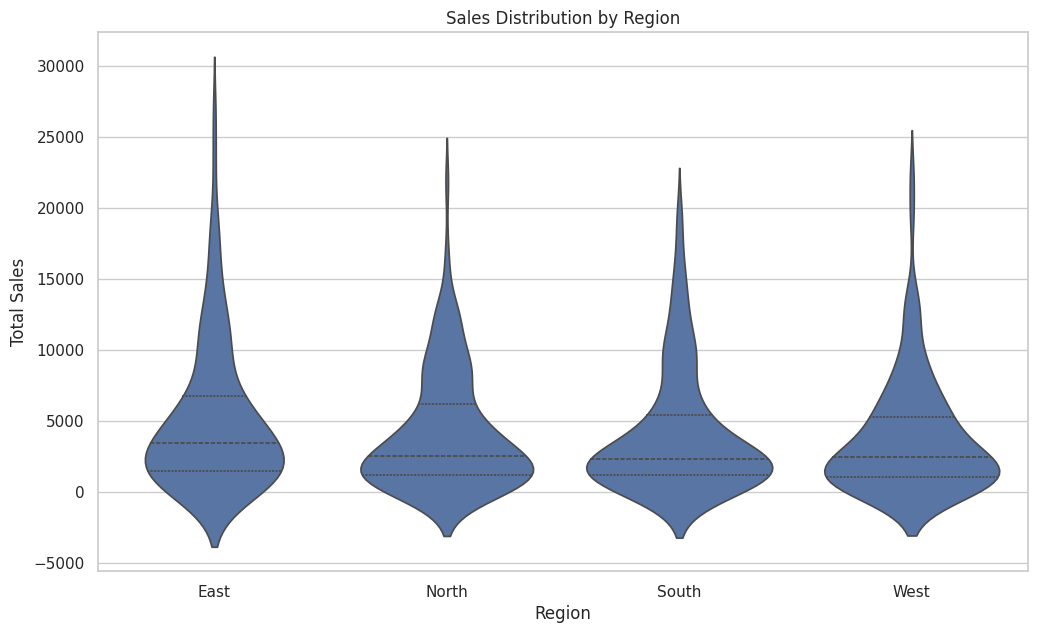

In [21]:
plt.figure(figsize=(12, 7))
sns.violinplot(data=df, x='Region', y='Total_Sales', inner='quartile')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

## Swarm Plot :

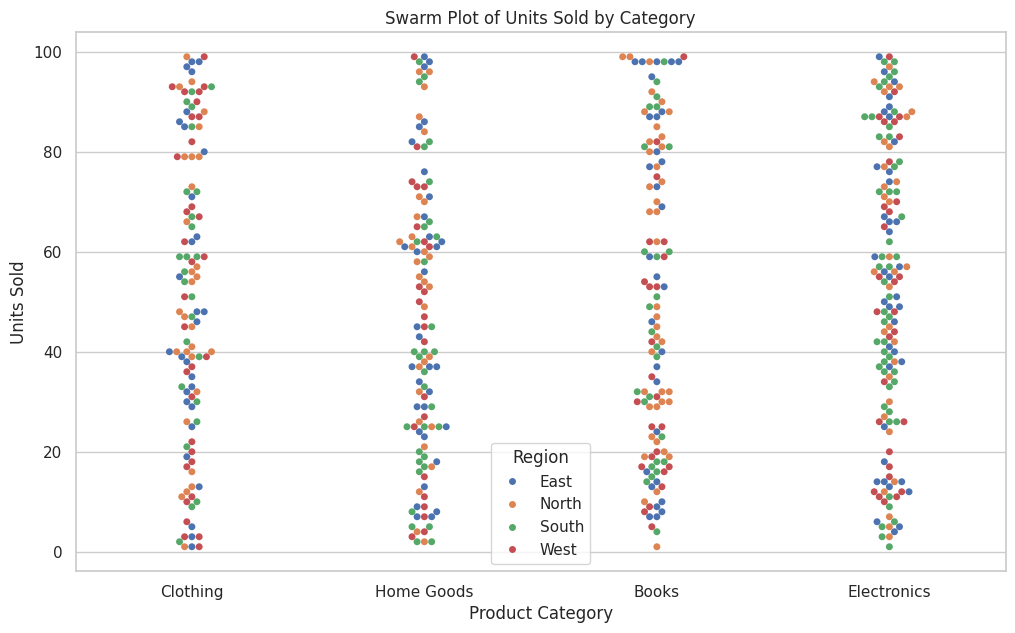

In [22]:
plt.figure(figsize=(12, 7))
sns.swarmplot(data=df, x='Product_Category', y='Units_Sold', hue='Region')
plt.title('Swarm Plot of Units Sold by Category')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.show()

## Count Plot :

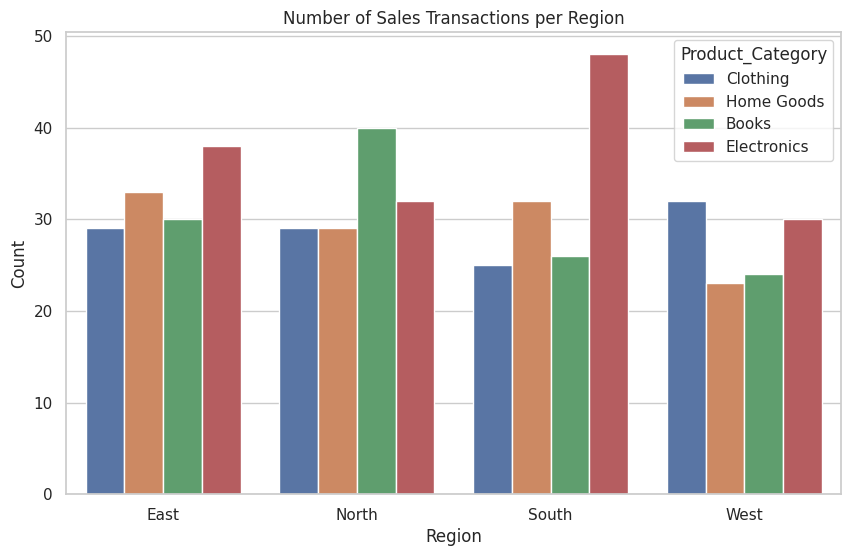

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region', hue='Product_Category')
plt.title('Number of Sales Transactions per Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

## Heatmap :

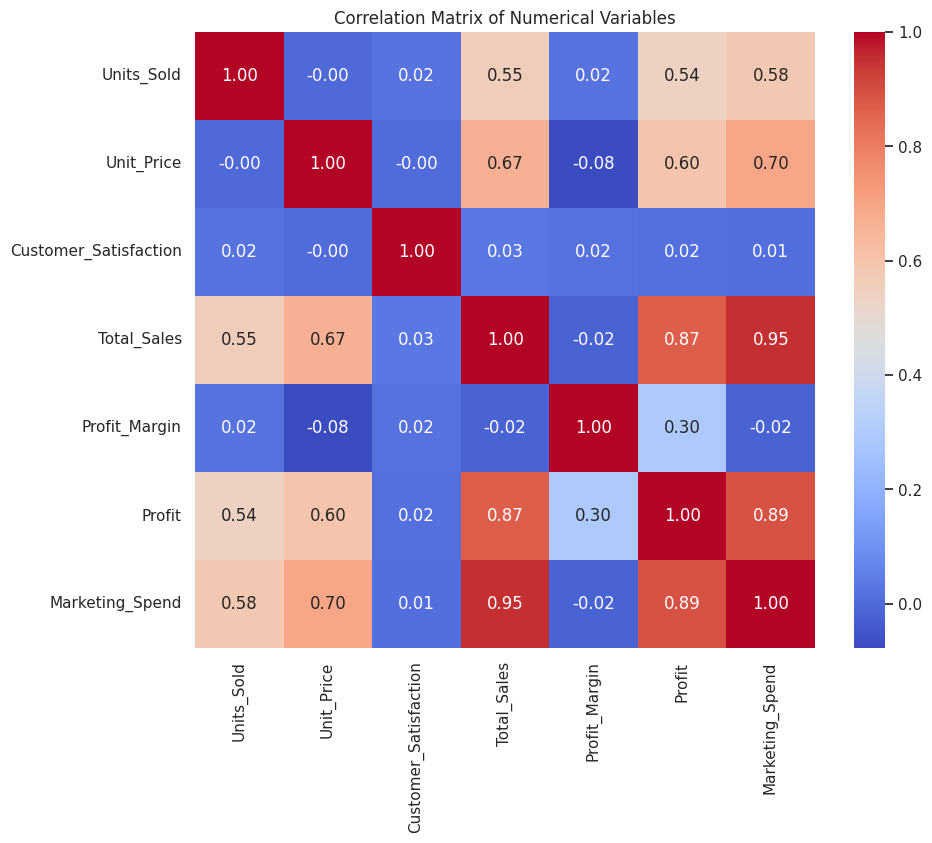

In [24]:
# Select only numeric columns for correlation matrix
numeric_df = df[['Units_Sold', 'Unit_Price', 'Customer_Satisfaction', 'Total_Sales', 'Profit_Margin', 'Profit', 'Marketing_Spend']]
corr_matrix = numeric_df.corr()

# Create the plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Linear Model Plot (lmplot) :

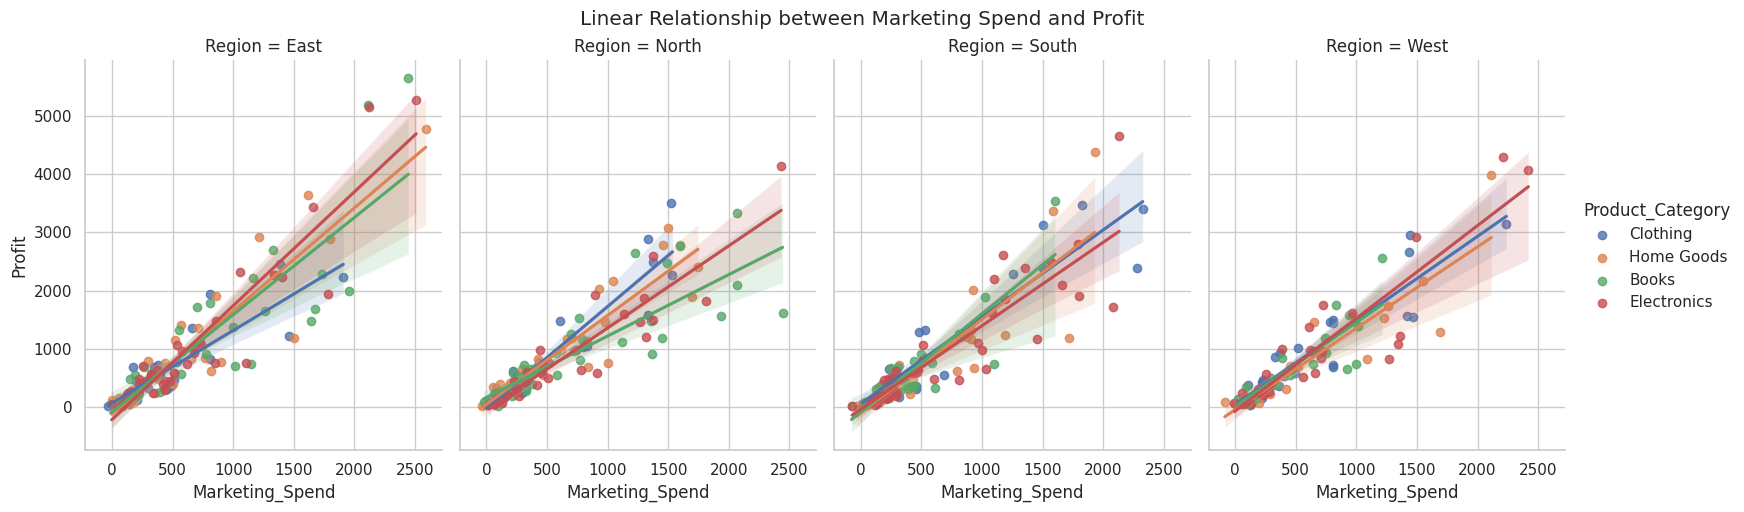

In [25]:
sns.lmplot(
    data=df,
    x='Marketing_Spend',
    y='Profit',
    hue='Product_Category',
    col='Region', # Create columns for each region
    height=5,
    aspect=0.8
)
plt.suptitle('Linear Relationship between Marketing Spend and Profit', y=1.02)
plt.show()

 ## Joint Plot :

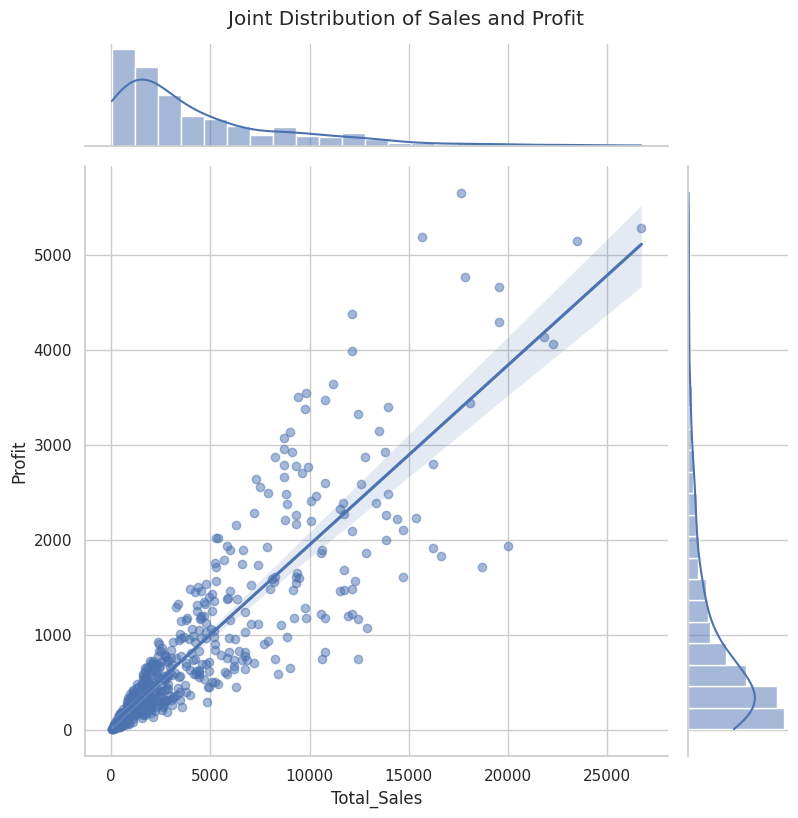

In [26]:
sns.jointplot(data=df, x='Total_Sales', y='Profit', kind='reg', # 'reg' adds a regression line
              height=8, scatter_kws={'alpha': 0.5})
plt.suptitle('Joint Distribution of Sales and Profit', y=1.02)
plt.show()

## Pair Plot :

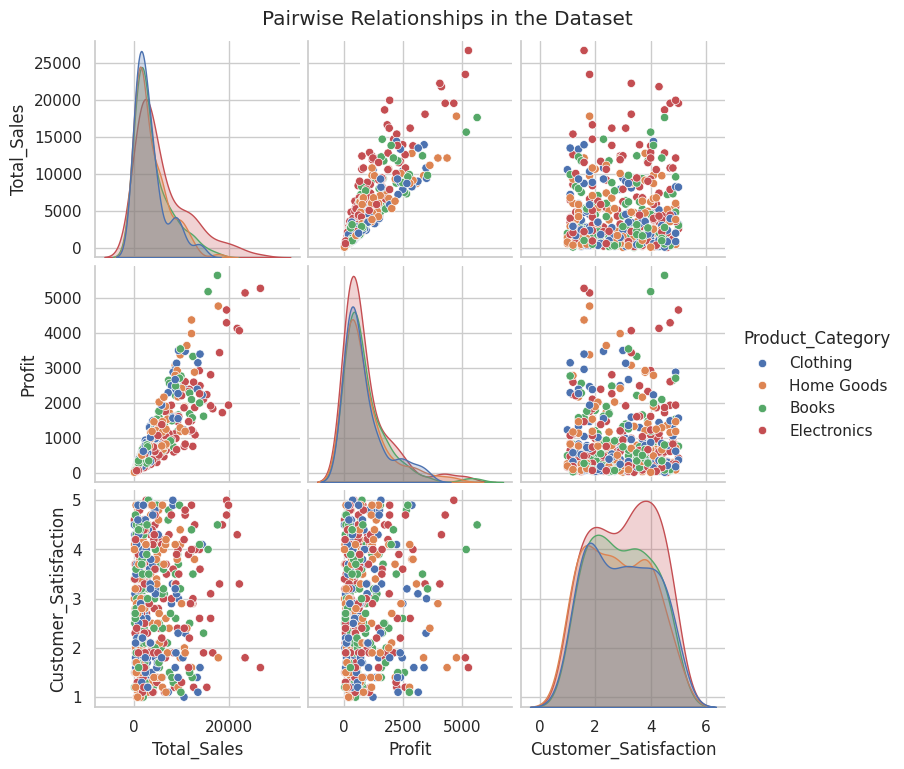

In [27]:
# Using a subset of columns for clarity
subset_df = df[['Total_Sales', 'Profit', 'Customer_Satisfaction', 'Product_Category']]
sns.pairplot(subset_df, hue='Product_Category', diag_kind='kde')
plt.suptitle('Pairwise Relationships in the Dataset', y=1.02)
plt.show()

## FacetGrid :

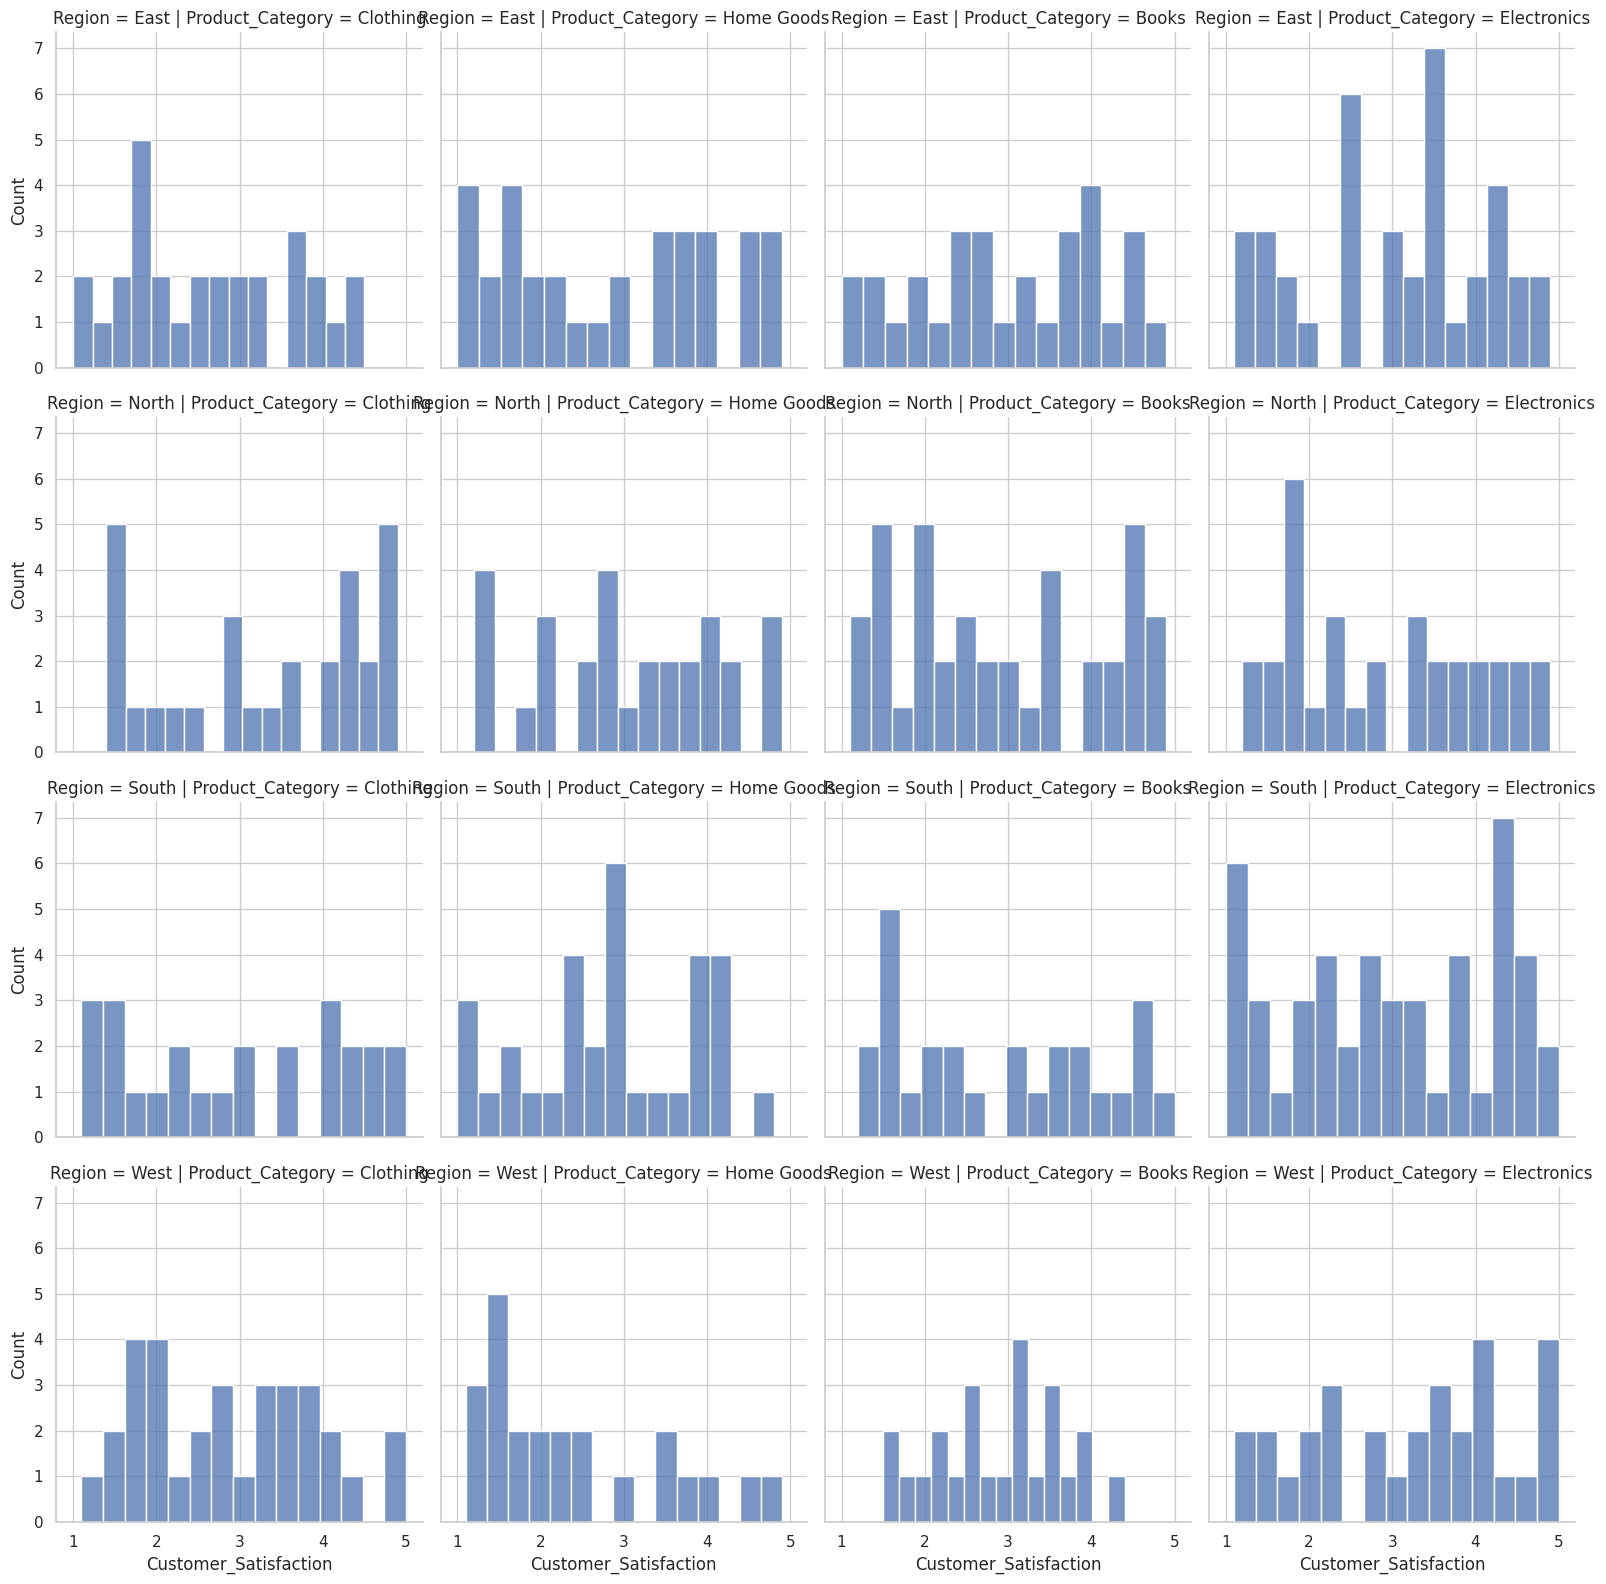

In [28]:
g = sns.FacetGrid(df, col="Product_Category", row="Region", height=4, aspect=1)
g.map(sns.histplot, "Customer_Satisfaction", bins=15)
g.add_legend()
plt.show()

## Point Plot :

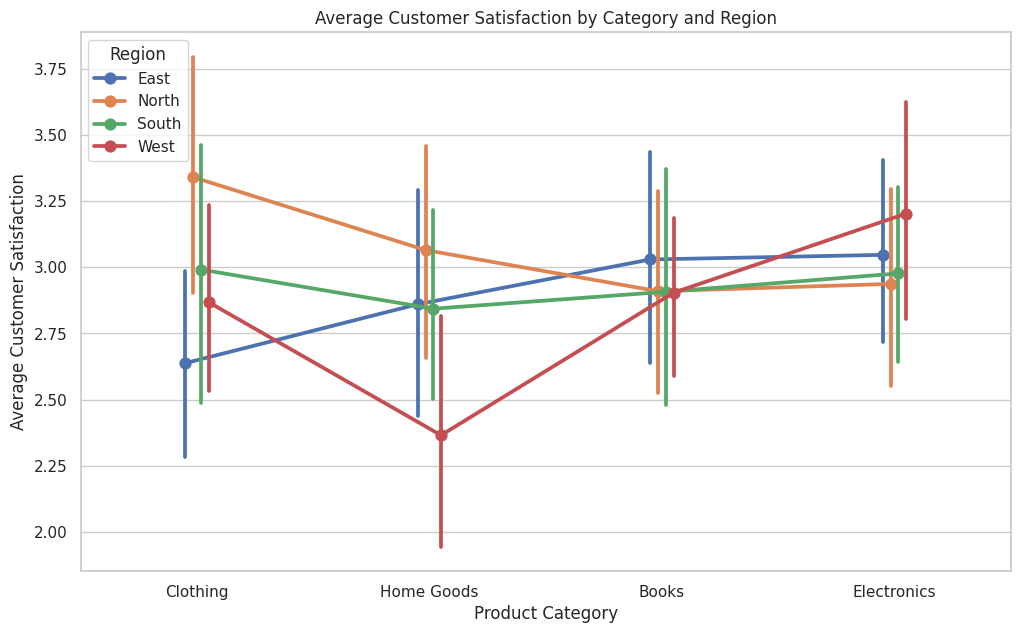

In [29]:
plt.figure(figsize=(12, 7))
sns.pointplot(data=df, x='Product_Category', y='Customer_Satisfaction', hue='Region', dodge=True)
plt.title('Average Customer Satisfaction by Category and Region')
plt.xlabel('Product Category')
plt.ylabel('Average Customer Satisfaction')
plt.show()

## Empirical Cumulative Distribution Plot (ECDF) :

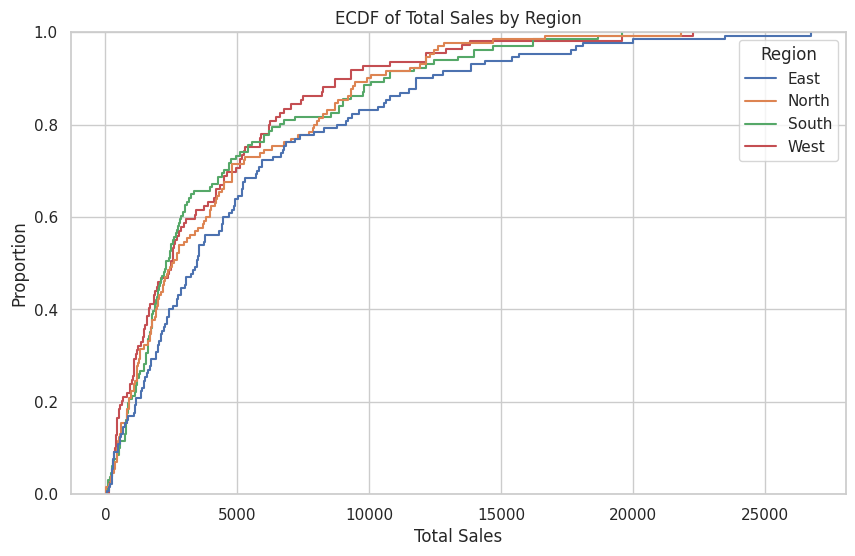

In [30]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='Total_Sales', hue='Region')
plt.title('ECDF of Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Proportion')
plt.show()

## Rug Plot :

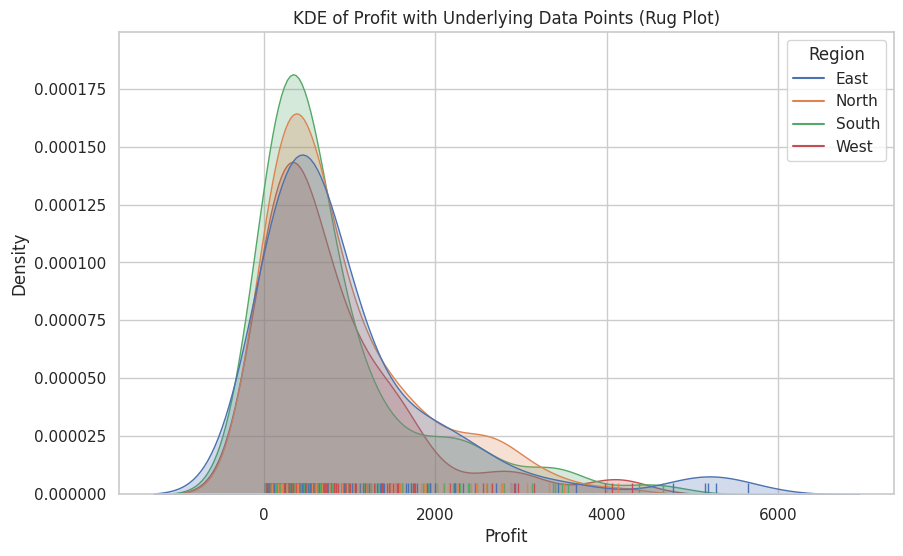

In [31]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Profit', hue='Region', fill=True)
sns.rugplot(data=df, x='Profit', hue='Region')
plt.title('KDE of Profit with Underlying Data Points (Rug Plot)')
plt.xlabel('Profit')
plt.show()

## Cluster Map :

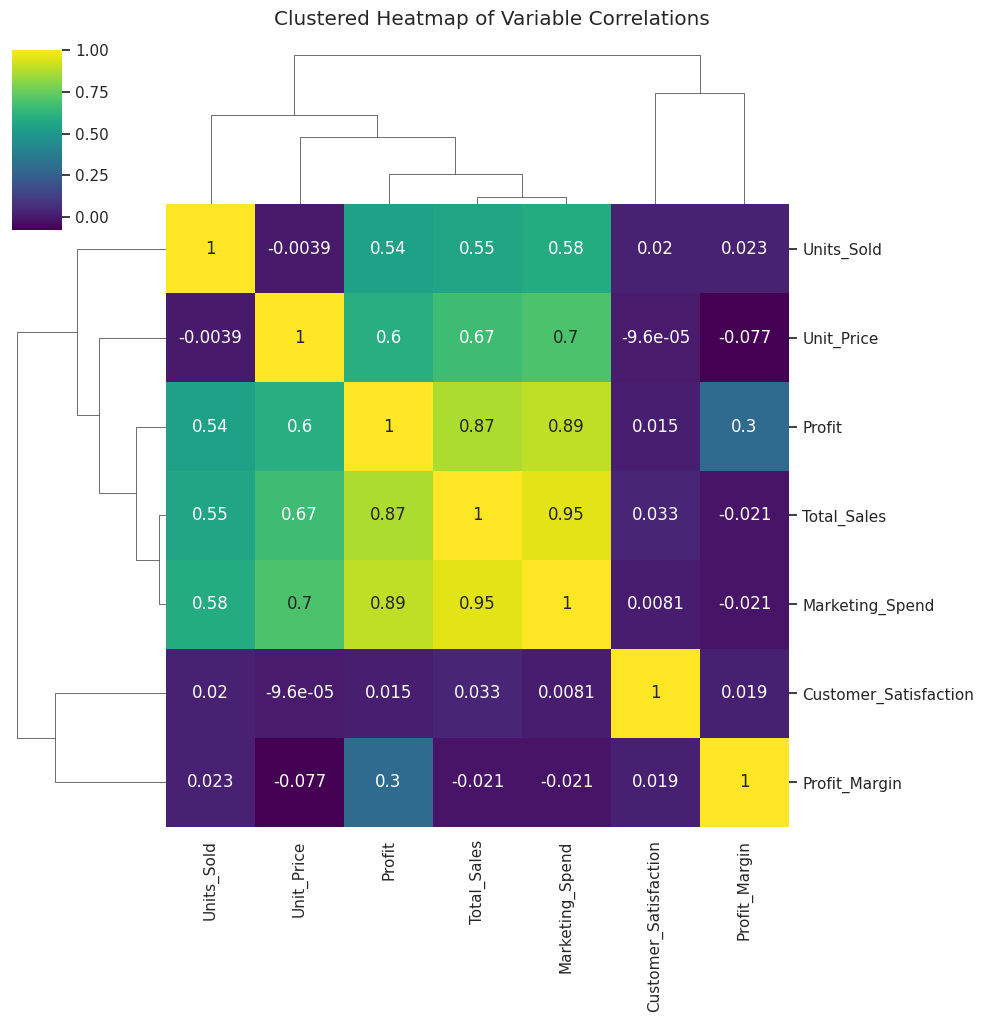

In [32]:
# Use the correlation matrix from the heatmap example
numeric_df = df[['Units_Sold', 'Unit_Price', 'Customer_Satisfaction', 'Total_Sales', 'Profit_Margin', 'Profit', 'Marketing_Spend']]
corr_matrix = numeric_df.corr()

sns.clustermap(corr_matrix, annot=True, cmap='viridis', figsize=(10, 10))
plt.suptitle('Clustered Heatmap of Variable Correlations', y=1.02)
plt.show()

 ## Boxen Plot :

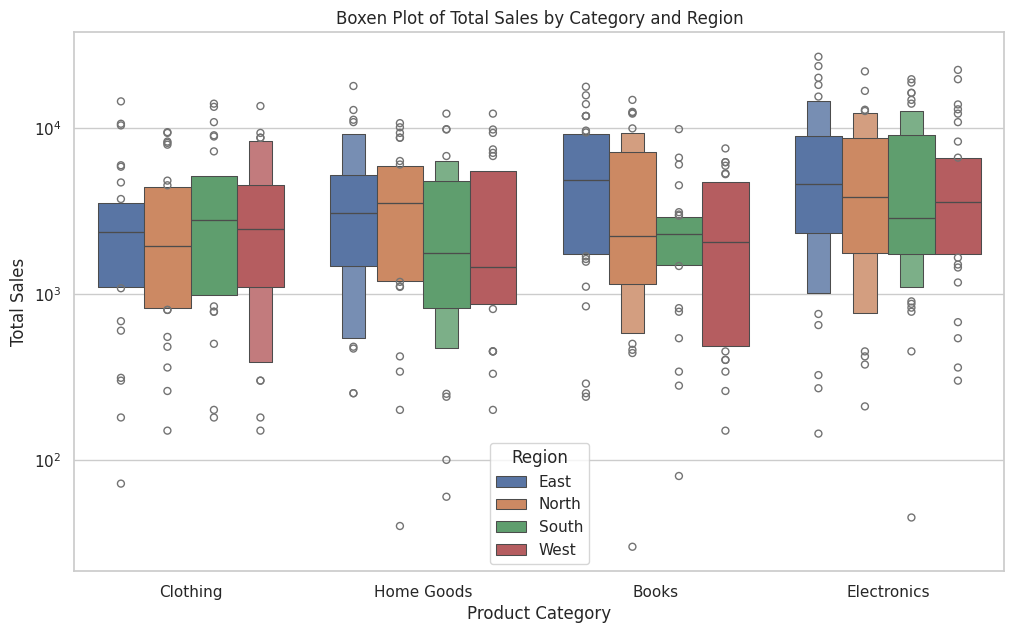

In [33]:
plt.figure(figsize=(12, 7))
sns.boxenplot(data=df, x='Product_Category', y='Total_Sales', hue='Region')
plt.title('Boxen Plot of Total Sales by Category and Region')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.yscale('log') # Use log scale for better visibility of distributions
plt.show()

## Ridge Plot (FacetGrid with KDE) :

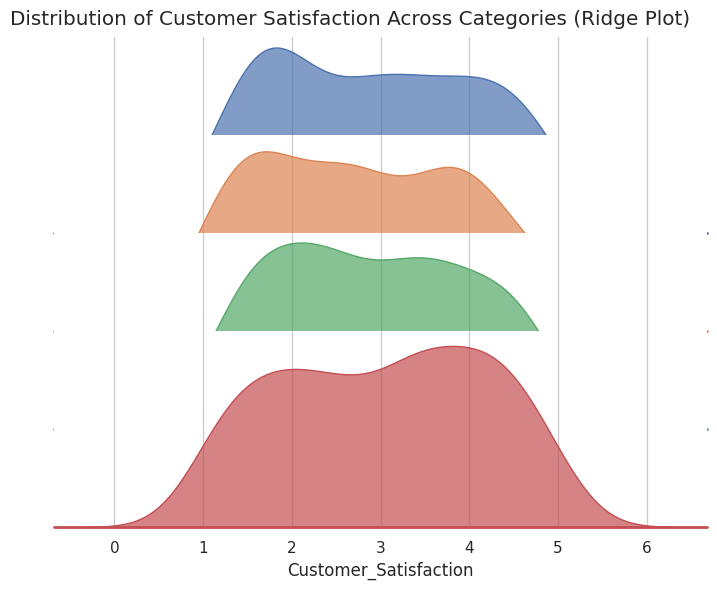

In [34]:
# Create the FacetGrid
g = sns.FacetGrid(df, row="Product_Category", hue="Product_Category", aspect=5, height=1.5)

# Map the density plots
g.map(sns.kdeplot, "Customer_Satisfaction", fill=True, alpha=0.7)

# Add a white line at the bottom of each plot
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Set titles and clean up the plot
g.fig.subplots_adjust(hspace=-0.5)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.suptitle('Distribution of Customer Satisfaction Across Categories (Ridge Plot)', y=0.98)
plt.show()